# UK ROAD ACCIDENTS

## 1. DATA
our goal is to develop an ML/DL model to predict if a police officer is likely to attend an accident or not. 
    
#### 1.1 LOAD AND MERGE DATA
The UK statistics relate to personal injury accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident reporting form. All the data variables are coded and split into three separate data sets: Accident, Vehicle, and Casualty. The target value can be found only in Accidents data. At the same time, Vehicle and Casualty data contain unique information. For that reason, we choose to use all 3 data sets.<br/><br/>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

##### 1.1.1. Load data

In [2]:
# load data
df_accidents = pd.read_csv('2017/accidents_2017.csv', low_memory=False)
df_vehicles = pd.read_csv('2017/vehicles_2017.csv', low_memory=False)
df_casualties = pd.read_csv('2017/casualties_2017.csv', low_memory=False)

In [3]:
# df_accidents[:5].T

In [4]:
# df_vehicles[:5].T

In [5]:
# df_casualties[:5].T

In [6]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129982 entries, 0 to 129981
Data columns (total 32 columns):
Accident_Index                                 129982 non-null object
Location_Easting_OSGR                          129963 non-null float64
Location_Northing_OSGR                         129963 non-null float64
Longitude                                      129953 non-null float64
Latitude                                       129953 non-null float64
Police_Force                                   129982 non-null int64
Accident_Severity                              129982 non-null int64
Number_of_Vehicles                             129982 non-null int64
Number_of_Casualties                           129982 non-null int64
Date                                           129982 non-null object
Day_of_Week                                    129982 non-null int64
Time                                           129979 non-null object
Local_Authority_(District)                     129

In [7]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238926 entries, 0 to 238925
Data columns (total 23 columns):
Accident_Index                      238926 non-null object
Vehicle_Reference                   238926 non-null int64
Vehicle_Type                        238926 non-null int64
Towing_and_Articulation             238926 non-null int64
Vehicle_Manoeuvre                   238926 non-null int64
Vehicle_Location-Restricted_Lane    238926 non-null int64
Junction_Location                   238926 non-null int64
Skidding_and_Overturning            238926 non-null int64
Hit_Object_in_Carriageway           238926 non-null int64
Vehicle_Leaving_Carriageway         238926 non-null int64
Hit_Object_off_Carriageway          238926 non-null int64
1st_Point_of_Impact                 238926 non-null int64
Was_Vehicle_Left_Hand_Drive?        238926 non-null int64
Journey_Purpose_of_Driver           238926 non-null int64
Sex_of_Driver                       238926 non-null int64
Age_of_Driver     

In [8]:
df_casualties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170993 entries, 0 to 170992
Data columns (total 16 columns):
Accident_Index                        170993 non-null object
Vehicle_Reference                     170993 non-null int64
Casualty_Reference                    170993 non-null int64
Casualty_Class                        170993 non-null int64
Sex_of_Casualty                       170993 non-null int64
Age_of_Casualty                       170993 non-null int64
Age_Band_of_Casualty                  170993 non-null int64
Casualty_Severity                     170993 non-null int64
Pedestrian_Location                   170993 non-null int64
Pedestrian_Movement                   170993 non-null int64
Car_Passenger                         170993 non-null int64
Bus_or_Coach_Passenger                170993 non-null int64
Pedestrian_Road_Maintenance_Worker    170993 non-null int64
Casualty_Type                         170993 non-null int64
Casualty_Home_Area_Type               170993 non

##### 1.1.2. Merge data

In [9]:
df_full = pd.concat([df_accidents, df_casualties, df_vehicles], join='inner', axis=1)

# remove duplicate columns
df_full = df_full.loc[:,~df_full.columns.duplicated()]

In [10]:
df_full[:5].T

,0,1,2,3,4
Accident_Index,2017010001708,2017010009342,2017010009344,2017010009348,2017010009350
Location_Easting_OSGR,532920,526790,535200,534340,533680
Location_Northing_OSGR,196330,181970,181260,193560,187820
Longitude,-0.080107,-0.173845,-0.052969,-0.060658,-0.072372
Latitude,51.6501,51.5224,51.5141,51.6248,51.5734
Police_Force,1,1,1,1,1
Accident_Severity,1,3,3,3,2
Number_of_Vehicles,2,2,3,2,1
Number_of_Casualties,3,1,1,1,1
Date,05/08/2017,01/01/2017,01/01/2017,01/01/2017,01/01/2017


In [11]:
#column names
# df_full.columns

### 1.2 MISSING VALUES
Some of the columns have too many missing values ranging from 5 to 43%. We remove those columns and then remove rows with the rest of the missing values. Alternatively, we could try to fill the missing values (f.e. with the mean values), but this could potentially bias the data. We have remaining enough data so that removing missing data is the safest way to go. <br/><br/>

In [12]:
df_cleaned = df_full.copy()

In [13]:
df_cleaned.replace(-1, np.nan, inplace=True)

In [14]:
# count missing values
df_cleaned.isnull().sum().sort_values(ascending=False)

Junction_Control                               56296
2nd_Road_Class                                 54412
Vehicle_IMD_Decile                             37678
Driver_IMD_Decile                              37678
Driver_Home_Area_Type                          37080
Age_of_Vehicle                                 33384
Casualty_IMD_Decile                            30135
Casualty_Home_Area_Type                        29619
Engine_Capacity_(CC)                           28825
Propulsion_Code                                28561
Age_Band_of_Driver                             17872
Age_of_Driver                                  17872
LSOA_of_Accident_Location                       7131
Was_Vehicle_Left_Hand_Drive?                    6814
Skidding_and_Overturning                        4644
Hit_Object_in_Carriageway                       4539
Towing_and_Articulation                         4299
Vehicle_Leaving_Carriageway                     4042
Vehicle_Manoeuvre                             

Text(0.5, 1.0, 'Missing values by feature')

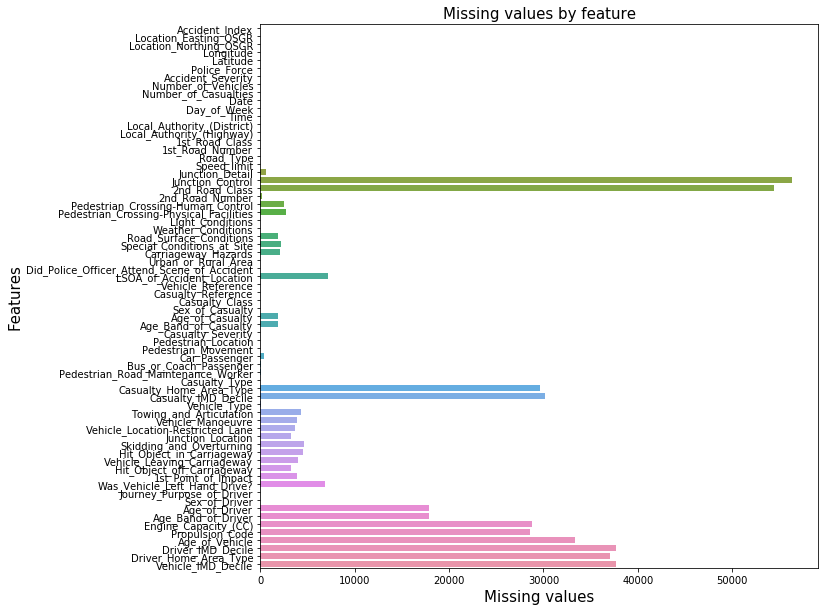

In [15]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=df_cleaned.isnull().sum(), y=df_full.columns)
plt.xlabel('Missing values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Missing values by feature', fontsize=15)

In [16]:
df_cleaned.drop(columns=['Junction_Control',
                         '2nd_Road_Class',
                         'Vehicle_IMD_Decile',
                         'Driver_IMD_Decile',
                         'Driver_Home_Area_Type',
                         'Age_of_Vehicle',
                         'Casualty_IMD_Decile',
                         'Casualty_Home_Area_Type',
                         'Engine_Capacity_(CC)',
                         'Propulsion_Code',
                         'Age_Band_of_Driver', 
                         'Age_of_Driver',
                         'LSOA_of_Accident_Location',
                         'Was_Vehicle_Left_Hand_Drive?',
                         'Skidding_and_Overturning'], inplace= True)

In [17]:
df_cleaned.dropna(inplace=True)

In [18]:
#reset index
df_cleaned.reset_index(drop = True, inplace = True)

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116502 entries, 0 to 116501
Data columns (total 53 columns):
Accident_Index                                 116502 non-null object
Location_Easting_OSGR                          116502 non-null float64
Location_Northing_OSGR                         116502 non-null float64
Longitude                                      116502 non-null float64
Latitude                                       116502 non-null float64
Police_Force                                   116502 non-null int64
Accident_Severity                              116502 non-null int64
Number_of_Vehicles                             116502 non-null int64
Number_of_Casualties                           116502 non-null int64
Date                                           116502 non-null object
Day_of_Week                                    116502 non-null int64
Time                                           116502 non-null object
Local_Authority_(District)                     116

### 1.3 DATA CLEANING
Reading CSVs into pandas DataFrame sometimes result in data type mismatch that needs to be corrected. As a bonus, correcting the data types significantly reduce the DataFrame size from 47.9+ MB to 27.1+ MB (reduction of 43%).<br/><br/>

In [20]:
# df_accidents

df_cleaned['Location_Easting_OSGR'] = df_cleaned['Location_Easting_OSGR'].astype(int)
df_cleaned['Location_Northing_OSGR'] = df_cleaned['Location_Northing_OSGR'].astype(int)
df_cleaned['Longitude'] = df_cleaned['Longitude'].astype(float)
df_cleaned['Latitude'] = df_cleaned['Latitude'].astype(float)
df_cleaned['Police_Force'] = df_cleaned['Police_Force'].astype(int)
df_cleaned['Accident_Severity'] = df_cleaned['Accident_Severity'].astype(int)
df_cleaned['Number_of_Vehicles'] = df_cleaned['Number_of_Vehicles'].astype(int)
df_cleaned['Number_of_Casualties'] = df_cleaned['Number_of_Casualties'].astype(int)
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date']).dt.date
df_cleaned['Day_of_Week'] = df_cleaned['Day_of_Week'].astype(int)
df_cleaned['Hour'] = pd.to_datetime(df_cleaned['Time']).dt.hour.astype(int)
df_cleaned['Local_Authority_(District)'] = df_cleaned['Local_Authority_(District)'].astype(int)
df_cleaned['Local_Authority_(Highway)'] = df_cleaned['Local_Authority_(Highway)'].astype(str)
df_cleaned['1st_Road_Class'] = df_cleaned['1st_Road_Class'].astype(int)
df_cleaned['1st_Road_Number'] = df_cleaned['1st_Road_Number'].astype(int)
df_cleaned['Road_Type'] = df_cleaned['Road_Type'].astype(int)
df_cleaned['Speed_limit'] = df_cleaned['Speed_limit'].astype(int)
df_cleaned['Junction_Detail'] = df_cleaned['Junction_Detail'].astype(int)
df_cleaned['2nd_Road_Number'] = df_cleaned['2nd_Road_Number'].astype(int)
df_cleaned['Pedestrian_Crossing-Human_Control'] = df_cleaned['Pedestrian_Crossing-Human_Control'].astype(int)
df_cleaned['Pedestrian_Crossing-Physical_Facilities'] = df_cleaned['Pedestrian_Crossing-Physical_Facilities'].astype(int)
df_cleaned['Light_Conditions'] = df_cleaned['Light_Conditions'].astype(int)
df_cleaned['Weather_Conditions'] = df_cleaned['Weather_Conditions'].astype(int)
df_cleaned['Road_Surface_Conditions'] = df_cleaned['Road_Surface_Conditions'].astype(int)
df_cleaned['Special_Conditions_at_Site'] = df_cleaned['Special_Conditions_at_Site'].astype(int)
df_cleaned['Carriageway_Hazards'] = df_cleaned['Carriageway_Hazards'].astype(int)
df_cleaned['Urban_or_Rural_Area'] = df_cleaned['Urban_or_Rural_Area'].astype(int)
# replace target values to binary 
df_cleaned['Did_Police_Officer_Attend_Scene_of_Accident'].replace({2:0, 3:0}, inplace = True)
df_cleaned['Did_Police_Officer_Attend_Scene_of_Accident'] = df_cleaned['Did_Police_Officer_Attend_Scene_of_Accident'].astype(int)


# df_casualties
df_cleaned['Vehicle_Reference'] = df_cleaned['Vehicle_Reference'].astype(int)
df_cleaned['Casualty_Reference'] = df_cleaned['Casualty_Reference'].astype(int)
df_cleaned['Casualty_Class'] = df_cleaned['Casualty_Class'].astype(int)
df_cleaned['Sex_of_Casualty'] = df_cleaned['Sex_of_Casualty'].astype(int)
df_cleaned['Age_of_Casualty'] = df_cleaned['Age_of_Casualty'].astype(int)
df_cleaned['Age_Band_of_Casualty'] = df_cleaned['Age_Band_of_Casualty'].astype(int)
df_cleaned['Casualty_Severity'] = df_cleaned['Casualty_Severity'].astype(int)
df_cleaned['Pedestrian_Location'] = df_cleaned['Pedestrian_Location'].astype(int)
df_cleaned['Pedestrian_Movement'] = df_cleaned['Pedestrian_Movement'].astype(int)
df_cleaned['Car_Passenger'] = df_cleaned['Car_Passenger'].astype(int)
df_cleaned['Bus_or_Coach_Passenger'] = df_cleaned['Bus_or_Coach_Passenger'].astype(int)
df_cleaned['Pedestrian_Road_Maintenance_Worker'] = df_cleaned['Pedestrian_Road_Maintenance_Worker'].astype(int)
df_cleaned['Casualty_Type'] = df_cleaned['Casualty_Type'].astype(int)


# df_vehicles
df_cleaned['Vehicle_Reference'] = df_cleaned['Vehicle_Reference'].astype(int)
df_cleaned['Vehicle_Type'] = df_cleaned['Vehicle_Type'].astype(int)
df_cleaned['Towing_and_Articulation'] = df_cleaned['Towing_and_Articulation'].astype(int)
df_cleaned['Vehicle_Manoeuvre'] = df_cleaned['Vehicle_Manoeuvre'].astype(int)
df_cleaned['Vehicle_Location-Restricted_Lane'] = df_cleaned['Vehicle_Location-Restricted_Lane'].astype(int)
df_cleaned['Junction_Location'] = df_cleaned['Junction_Location'].astype(int)
# df_cleaned['Skidding_and_Overturning'] = df_cleaned['Skidding_and_Overturning'].astype(int)
df_cleaned['Hit_Object_in_Carriageway'] = df_cleaned['Hit_Object_in_Carriageway'].astype(int)
df_cleaned['Vehicle_Leaving_Carriageway'] = df_cleaned['Vehicle_Leaving_Carriageway'].astype(int)
df_cleaned['Hit_Object_off_Carriageway'] = df_cleaned['Hit_Object_off_Carriageway'].astype(int)
df_cleaned['1st_Point_of_Impact'] = df_cleaned['1st_Point_of_Impact'].astype(int)
df_cleaned['Journey_Purpose_of_Driver'] = df_cleaned['Journey_Purpose_of_Driver'].astype(int)
df_cleaned['Sex_of_Driver'] = df_cleaned['Sex_of_Driver'].astype(int)

In [21]:
df_cleaned[:5].T

,0,1,2,3,4
Accident_Index,2017010001708,2017010009342,2017010009344,2017010009348,2017010009350
Location_Easting_OSGR,532920,526790,535200,534340,533680
Location_Northing_OSGR,196330,181970,181260,193560,187820
Longitude,-0.080107,-0.173845,-0.052969,-0.060658,-0.072372
Latitude,51.6501,51.5224,51.5141,51.6248,51.5734
Police_Force,1,1,1,1,1
Accident_Severity,1,3,3,3,2
Number_of_Vehicles,2,2,3,2,1
Number_of_Casualties,3,1,1,1,1
Date,2017-05-08,2017-01-01,2017-01-01,2017-01-01,2017-01-01


In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116502 entries, 0 to 116501
Data columns (total 54 columns):
Accident_Index                                 116502 non-null object
Location_Easting_OSGR                          116502 non-null int32
Location_Northing_OSGR                         116502 non-null int32
Longitude                                      116502 non-null float64
Latitude                                       116502 non-null float64
Police_Force                                   116502 non-null int32
Accident_Severity                              116502 non-null int32
Number_of_Vehicles                             116502 non-null int32
Number_of_Casualties                           116502 non-null int32
Date                                           116502 non-null object
Day_of_Week                                    116502 non-null int32
Time                                           116502 non-null object
Local_Authority_(District)                     116502 

<br></br>
<br></br>
### 1.4 EXPLORATION AND VISUALIZATION
#### 1.4.1. CATEGORICAL VALUES
DATA has only categorical values. That will cause some troubles as some sophisticated algorithms (SVM, KNN, etc.) rely heavily on scaling.

#### 1.4.2. HEATMAP (feature correlation)
Another aspect of the data - features show only a very weak correlation.

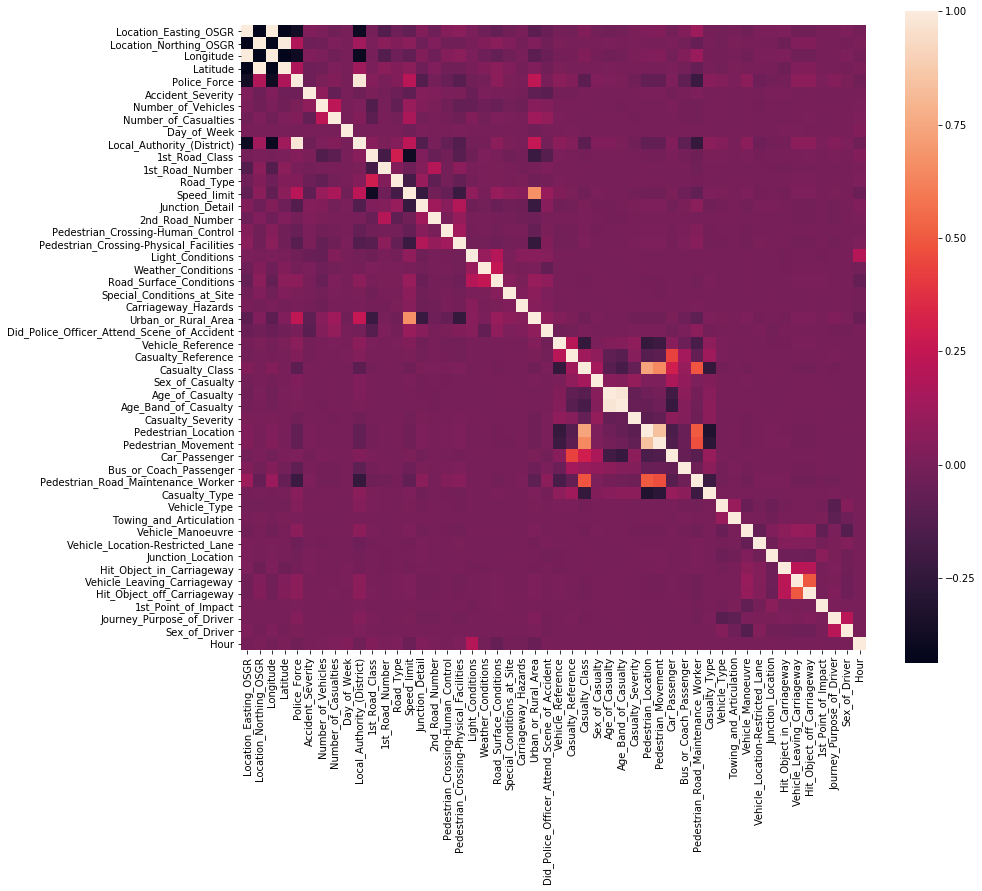

In [23]:
plt.subplots(figsize=(14,12))
sns.heatmap(df_cleaned.corr(), square=True)

<Figure size 432x288 with 0 Axes>

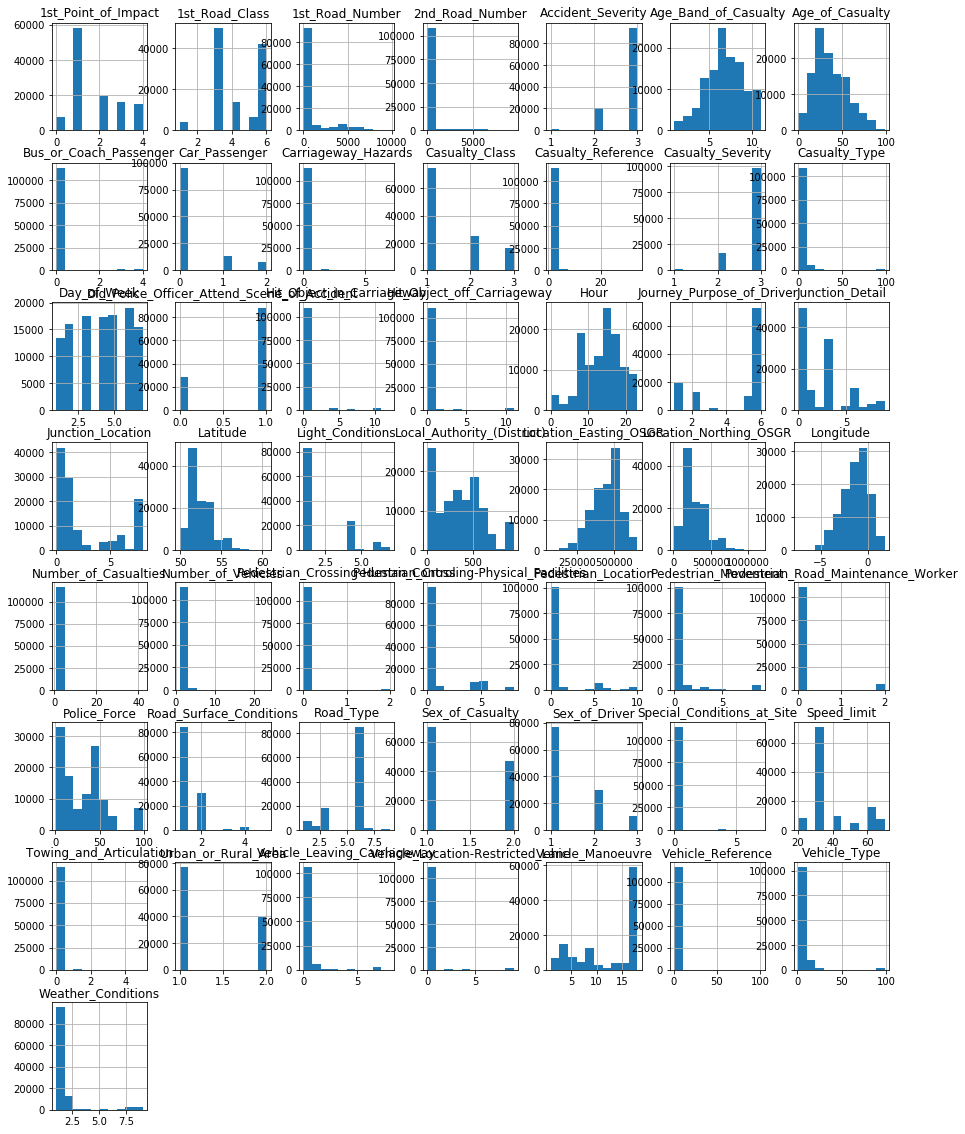

<Figure size 432x288 with 0 Axes>

In [24]:
df_cleaned.hist(figsize=(15,20))
plt.figure()

Text(0.5, 1.0, 'Accidents by day')

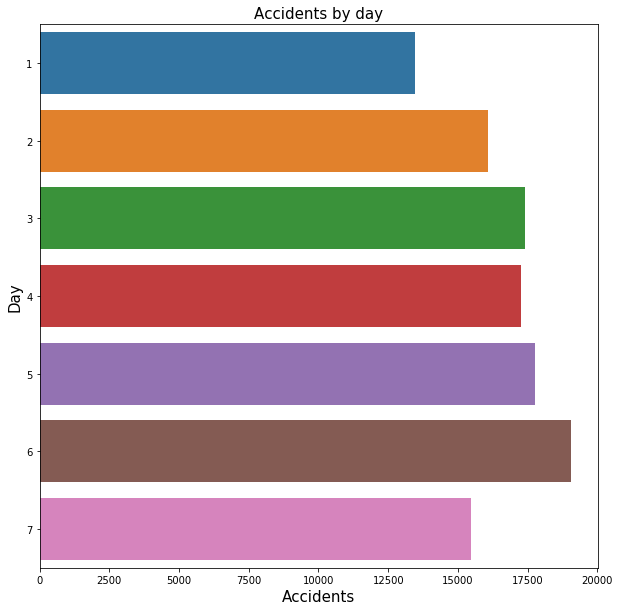

In [25]:
# accidents by day
acc_day = df_cleaned['Day_of_Week'].value_counts()

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=acc_day, y=acc_day.index, orient = 'h')
plt.xlabel('Accidents', fontsize=15)
plt.ylabel('Day', fontsize=15)
plt.title('Accidents by day', fontsize=15)

<br></br>
#### 1.4.3. FOLIUM
An interactive map showing clusters with accidents on public roads.

In [26]:
import folium
from folium.plugins import FastMarkerCluster

In [27]:
# jupyter notebook has problems rendering large amount of markers in folium.
# We show here first 50K samples and additionaly create and save another map with full dataset for presentation

fmap = folium.Map(location=[51.5074, -0.1278], zoom_start=11)
locations = list(zip(df_cleaned.Latitude[:50000], df_cleaned.Longitude[:50000]))
fmap.add_child(FastMarkerCluster(locations))

In [28]:
fmap_pr = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

loc = list(zip(df_cleaned.Latitude, df_cleaned.Longitude))
cl = fmap_pr.add_child(FastMarkerCluster(loc))

fmap_pr.save("folium_uk_accidents.html")

<br></br>
<br></br>
<br></br>
## 2. MACHINE LEARNING
In this section, we try different ML Classifiers (single models and ensembles) and compare results.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
df_cleaned[:5].T

,0,1,2,3,4
Accident_Index,2017010001708,2017010009342,2017010009344,2017010009348,2017010009350
Location_Easting_OSGR,532920,526790,535200,534340,533680
Location_Northing_OSGR,196330,181970,181260,193560,187820
Longitude,-0.080107,-0.173845,-0.052969,-0.060658,-0.072372
Latitude,51.6501,51.5224,51.5141,51.6248,51.5734
Police_Force,1,1,1,1,1
Accident_Severity,1,3,3,3,2
Number_of_Vehicles,2,2,3,2,1
Number_of_Casualties,3,1,1,1,1
Date,2017-05-08,2017-01-01,2017-01-01,2017-01-01,2017-01-01


In [31]:
cols = ['Police_Force',
        'Local_Authority_(District)',
        'Carriageway_Hazards',
        'Accident_Severity',
        'Number_of_Vehicles',
        'Number_of_Casualties',
        'Day_of_Week',
        'Road_Type',
        'Speed_limit',
        'Junction_Detail',
        'Pedestrian_Crossing-Human_Control',
        'Pedestrian_Crossing-Physical_Facilities',
        'Light_Conditions',
        'Weather_Conditions',
        'Road_Surface_Conditions',
        'Special_Conditions_at_Site',
        'Urban_or_Rural_Area',
        'Hour',
        'Vehicle_Reference',
        'Casualty_Reference',
#         'Casualty_Class',
#         'Sex_of_Casualty',
#         'Age_of_Casualty',
#         'Age_Band_of_Casualty',
        'Casualty_Severity',
#         'Pedestrian_Location',
#         'Pedestrian_Movement',
#         'Car_Passenger',
#         'Bus_or_Coach_Passenger',
        'Pedestrian_Road_Maintenance_Worker',
#         'Casualty_Type',
#         'Vehicle_Type',
#         'Towing_and_Articulation',
#         'Vehicle_Manoeuvre',
#         'Vehicle_Location-Restricted_Lane',
        'Junction_Location',
#         'Skidding_and_Overturning',
#         'Hit_Object_in_Carriageway',
        'Vehicle_Leaving_Carriageway',
#         'Hit_Object_off_Carriageway',
#         '1st_Point_of_Impact',
        'Journey_Purpose_of_Driver',
        'Sex_of_Driver'
       ]

target = df_cleaned['Did_Police_Officer_Attend_Scene_of_Accident']

df_ml = pd.get_dummies(df_cleaned[cols].astype(str))

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df_ml, target, test_size=0.2, random_state=42)

<br></br>
### 2.1. SINGLE MODELS
#### 2.1.1. Logistic Regression

In [33]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = logreg.score(x_test, y_test)
print('Accuracy LogisticRegression: {:5.2f}%'.format(100*acc_logreg))

Accuracy LogisticRegression: 78.93%


Text(0.5, 15.0, 'Predicted label')

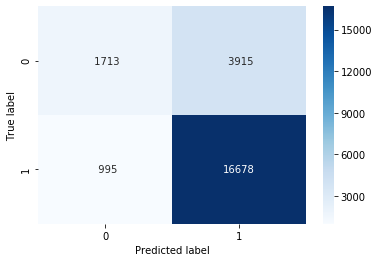

In [34]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure() 
sns.heatmap(cm, annot=True, cmap='Blues', fmt='5d')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### 2.1.2. LinearSVC

In [35]:
linear_svc = LinearSVC(max_iter=5000)
linear_svc.fit(x_train, y_train)
# y_pred = linear_svc.predict(x_test)
acc_linear_svc = linear_svc.score(x_test, y_test)
print('Accuracy LinearSVC: {:5.2f}%'.format(100*acc_linear_svc))

Accuracy LinearSVC: 78.85%


#### 2.1.3. SGD

In [36]:
sgd = SGDClassifier(n_jobs= -1)
sgd.fit(x_train, y_train)
# y_pred = sgd.predict(x_test)
acc_sgd = sgd.score(x_test, y_test)
print('Accuracy SGD: {:5.2f}%'.format(100*acc_sgd))

Accuracy SGD: 77.56%


#### 2.1.4. DecisionTree

In [37]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
# y_pred = decision_tree.predict(x_test)
acc_decision_tree = decision_tree.score(x_test, y_test)
print('Accuracy DecisionTree: {:5.2f}%'.format(100*acc_decision_tree))

Accuracy DecisionTree: 71.24%


<br></br>
### 2.2. ENSEMBLES

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

#### 2.2.1. RandomForest

In [39]:
random_forest = RandomForestClassifier(n_estimators=200, n_jobs= -1)
random_forest.fit(x_train, y_train)
# y_pred = random_forest.predict(x_test)
acc_random_forest = random_forest.score(x_test, y_test)
print('Accuracy RandomForest: {:5.2f}%'.format(100*acc_random_forest))

Accuracy RandomForest: 78.70%


#### 2.2.2. AdaBoost

In [40]:
ada_boost = AdaBoostClassifier(n_estimators=200)
ada_boost.fit(x_train, y_train)
# y_pred = ada_boost.predict(x_test)
acc_ada_boost = ada_boost.score(x_test, y_test)
print('Accuracy AdaBoost: {:5.2f}%'.format(100*acc_ada_boost))

Accuracy AdaBoost: 78.82%


#### 2.2.3. VotingClassifier

In [41]:
eclf = VotingClassifier(estimators=[('logreg', logreg),
                                    ('linsvc', linear_svc),
                                    ('ada_boost', ada_boost)],
                        voting='hard', n_jobs= -1)

eclf.fit(x_train, y_train)
acc_eclf = eclf.score(x_test, y_test)
print('Accuracy VotingClassifier: {:5.2f}%'.format(100*acc_eclf))

Accuracy VotingClassifier: 78.90%


<br></br>
<br></br>
<br></br>
## 3. DEEP LEARNING
In this section, we try a single DL model and compare it to ensembles of DL models

In [42]:
import tensorflow as tf
from tensorflow import feature_column
import tensorflow.keras.models
import tensorflow.keras.backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, DenseFeatures
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model

In [43]:
print(tensorflow.__version__)

2.0.0-beta1


In [44]:
cols = ['Police_Force',
        'Local_Authority_(District)',
        'Carriageway_Hazards',
        'Accident_Severity',
        'Number_of_Vehicles',
        'Number_of_Casualties',
        'Day_of_Week',
        'Road_Type',
        'Speed_limit',
        'Junction_Detail',
        'Pedestrian_Crossing-Human_Control',
        'Pedestrian_Crossing-Physical_Facilities',
        'Light_Conditions',
        'Weather_Conditions',
        'Road_Surface_Conditions',
        'Special_Conditions_at_Site',
        'Urban_or_Rural_Area',
        'Hour',
        'Vehicle_Reference',
        'Casualty_Reference',
#         'Casualty_Class',
#         'Sex_of_Casualty',
#         'Age_of_Casualty',
#         'Age_Band_of_Casualty',
        'Casualty_Severity',
#         'Pedestrian_Location',
#         'Pedestrian_Movement',
#         'Car_Passenger',
#         'Bus_or_Coach_Passenger',
        'Pedestrian_Road_Maintenance_Worker',
#         'Casualty_Type',
#         'Vehicle_Type',
#         'Towing_and_Articulation',
#         'Vehicle_Manoeuvre',
#         'Vehicle_Location-Restricted_Lane',
        'Junction_Location',
#         'Hit_Object_in_Carriageway',
        'Vehicle_Leaving_Carriageway',
#         'Hit_Object_off_Carriageway',
#         '1st_Point_of_Impact',
        'Journey_Purpose_of_Driver',
        'Sex_of_Driver'
       ]

target = df_cleaned['Did_Police_Officer_Attend_Scene_of_Accident']

df_dl = df_cleaned[cols]
# rename column to comply with tensorflow regex rules 
df_dl = df_dl.rename(columns={'Local_Authority_(District)':'Local_Authority_District'})

#####  3.0.1. DATA SPLIT: TRAIN / VALIDATION

In [45]:
x_train, x_val, y_train, y_val = train_test_split(df_dl, target, test_size=0.2, random_state=42)

In [46]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93201 entries, 81354 to 15795
Data columns (total 26 columns):
Police_Force                               93201 non-null int32
Local_Authority_District                   93201 non-null int32
Carriageway_Hazards                        93201 non-null int32
Accident_Severity                          93201 non-null int32
Number_of_Vehicles                         93201 non-null int32
Number_of_Casualties                       93201 non-null int32
Day_of_Week                                93201 non-null int32
Road_Type                                  93201 non-null int32
Speed_limit                                93201 non-null int32
Junction_Detail                            93201 non-null int32
Pedestrian_Crossing-Human_Control          93201 non-null int32
Pedestrian_Crossing-Physical_Facilities    93201 non-null int32
Light_Conditions                           93201 non-null int32
Weather_Conditions                         93201 non-nu

In [47]:
# convert pandas.DataFrames to TensorFlow.Datasets to be used in DL-models

bs = 512    #batch size
sh = len(df_dl)*2    #shuffle buffer

ds_train = tf.data.Dataset.from_tensor_slices((dict(x_train), y_train))
ds_train = ds_train.batch(bs)
ds_train = ds_train.shuffle(sh)

ds_val = tf.data.Dataset.from_tensor_slices((dict(x_val), y_val))
ds_val = ds_val.batch(bs)

##### 3.0.2. FEATURE COLUMNS

In [48]:
feature_columns = []

for c in df_dl.columns:
    cat = feature_column.categorical_column_with_identity(
            str(c),
            df_dl[str(c)].nunique(),
            default_value=0)
    
    col = feature_column.embedding_column(
            categorical_column=cat,
            dimension=10)
    
    feature_columns.append(col)

##### 3.0.3. MODEL GENERATOR

In [49]:
def modelGen(feature_columns):
    model = Sequential([
        DenseFeatures(feature_columns),
        Dense(256, activation='relu'),
        Dropout(rate=0.4),
        Dense(128, activation='relu'),
        Dropout(rate=0.4),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])
    
    return model

##### 3.0.4. CALLBACKS

In [50]:
check_point = ModelCheckpoint('models/tmp/model_1.hdf5',
                              monitor='val_acc',
                              verbose=0,
                              save_best_only=True,
                              save_weights_only = True,
                              mode='max')

In [51]:
reduce_lr=ReduceLROnPlateau(monitor='val_acc',
                            factor=0.5,
                            patience=2,
                            verbose=0,
                            mode='max',
                            min_delta=0.001,
                            cooldown=4,
                            min_lr=1e-6)

In [52]:
early_stop=EarlyStopping(monitor='val_acc',
                         min_delta=0.001,
                         patience=15,
                         verbose=0,
                         mode='max')

##### 3.0.5. LEARNING RATE FINDER

Learning rate finder is based on the paper “Cyclical Learning Rates for Training Neural Networks” by Leslie N. Smith:
<br></br>
<br></br>
It is known that the learning rate is the most important hyper-parameter to tune for training deep neural networks. This paper describes a new method for setting the learning rate, named cyclical learning rates, which practically eliminates the need to experimentally find the best values and schedule for the global learning rates. Instead of monotonically decreasing the learning rate, this method lets the learning rate cyclically vary between reasonable boundary values. Training with cyclical learning rates instead of fixed values achieves improved classification accuracy without a need to tune and often in fewer iterations. This paper also describes a simple way to estimate "reasonable bounds" -- linearly increasing the learning rate of the network for a few epochs. In addition, cyclical learning rates are demonstrated on the CIFAR-10 and CIFAR-100 datasets with ResNets, Stochastic Depth networks, and DenseNets, and the ImageNet dataset with the AlexNet and GoogLeNet architectures. These are practical tools for everyone who trains neural networks.

Source: https://arxiv.org/abs/1506.01186

Code source: http://puzzlemusa.com/2018/05/14/learning-rate-finder-using-keras/

In [53]:
class LR_Finder(Callback):
    
    def __init__(self, start_lr=1e-5, end_lr=10, step_size=None, beta=.98):
        super().__init__()
        
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.step_size = step_size
        self.beta = beta
        self.lr_mult = (end_lr/start_lr)**(1/step_size)
        
    def on_train_begin(self, logs=None):
        self.best_loss = 1e9
        self.avg_loss = 0
        self.losses, self.smoothed_losses, self.lrs, self.iterations = [], [], [], []
        self.iteration = 0
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.start_lr)
        
    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        self.iteration += 1
        
        self.avg_loss = self.beta * self.avg_loss + (1 - self.beta) * loss
        smoothed_loss = self.avg_loss / (1 - self.beta**self.iteration)
        
        # Check if the loss is not exploding
        if self.iteration>1 and smoothed_loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if smoothed_loss < self.best_loss or self.iteration==1:
            self.best_loss = smoothed_loss
        
        lr = self.start_lr * (self.lr_mult**self.iteration)
        
        self.losses.append(loss)
        self.smoothed_losses.append(smoothed_loss)
        self.lrs.append(lr)
        self.iterations.append(self.iteration)
        
        K.set_value(self.model.optimizer.lr, lr)  
        
    def plot_lr(self):
        plt.xlabel('Iterations')
        plt.ylabel('Learning rate')
        plt.plot(self.iterations, self.lrs)
        
    def plot(self, n_skip=10):
        plt.ylabel('Loss')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_smoothed_loss(self, n_skip=10):
        plt.ylabel('Smoothed Losses')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.smoothed_losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_loss(self):
        plt.ylabel('Losses')
        plt.xlabel('Iterations')
        plt.plot(self.iterations[10:], self.losses[10:])

In [54]:
lr_finder = LR_Finder(start_lr=1e-4, end_lr=1, step_size=100)

Epoch 1/3


W0703 23:02:53.385341 10896 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\feature_column\feature_column_v2.py:3040: IdentityCategoricalColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W0703 23:02:53.646341 10896 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\feature_column\feature_column_v2.py:2655: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


112/183 [=================>............] - ETA: 13s - loss: 1.4069 - acc: 0.6702

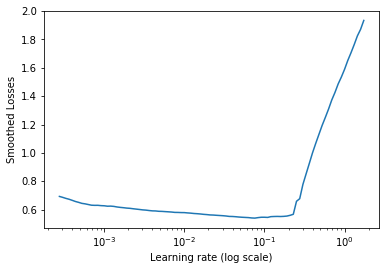

In [55]:
lrf_model = modelGen(feature_columns)

lrf_model.fit(ds_train,
             validation_data=ds_val,
             callbacks=[lr_finder],
             verbose = 1,
             epochs = 3
            )

lr_finder.plot_smoothed_loss()

### 3.1. SINGLE MODEL

In [56]:
s_model = modelGen(feature_columns)

s_model.optimizer.lr = 1e-2

s_model.fit(ds_train,
             validation_data=ds_val,
             callbacks=[check_point, reduce_lr, early_stop],
             verbose = 0,
             epochs = 30
            )

print('Single model training finished')

Single model training finished


In [57]:
# load best single model (there is currently a bug in TF preventing loading a model with DenseFeature layers.
# Instead of directly loading a model, we create a new one (run 1 batch to create weights) and load saved weight into it)
s_model = modelGen(feature_columns)
s_model.fit(ds_train, validation_data=ds_val, verbose = 0, steps_per_epoch=1, epochs = 1)
s_model.load_weights('models/tmp/model_1.hdf5')

# evaluating model accuracy
loss_single, acc_single = s_model.evaluate(ds_val,
                         steps=len(x_val)//bs + 1,
                         verbose=0)

print('Accuracy Deep Learning Single Model: {:5.2f}%'.format(100*acc_single))

Accuracy Deep Learning Single Model: 78.68%


### 3.2. ENSEMBLE
- use training set to fit multiple single models
- select top performing models
- predict on validation set
- split predictions from previous step into new train/validation sets
- train ensemble on this new train set
- predict ensemble on new validation set

In [58]:
# save trained single model 
models_all_acc = pd.DataFrame({'accuracy':acc_single, 'filepath':'models/tmp/model_1.hdf5'}, index=[0])

<br></br>

In [57]:
# train n models in a loop

def loopTrain(n_models):
    
    print('Model 1 accuracy: {:5.2f}%'.format(100*acc_single) + '\n')
        
    print('Training started\n')
    
    for i in range(2, n_models+1):
        m = modelGen(feature_columns)
        m.optimizer.lr = 1e-2
        
        filepath = 'models/tmp/model_' + str(i) + '.hdf5'
        check_point = ModelCheckpoint(filepath,
                              monitor='val_acc',
                              verbose=0,
                              save_best_only=True,
                              save_weights_only = True,
                              mode='max')
        
        m.fit(ds_train,
              validation_data=ds_val,
              callbacks=[check_point, reduce_lr, early_stop],
              verbose = 0,
              epochs = 30
             )
        
        # load best weights for the model
        m_best = loadModel(filepath)
        
        # evaluate model to get metrics
        loss, acc = m_best.evaluate(ds_val,
                         steps=len(x_val)//bs + 1,
                         verbose=0)
        
        # append trained model to the df of all models 
        models_all_acc=models_all_acc.append({'accuracy': acc, 'filepath':filepath}, ignore_index=True)

        print('Model ' + str(i) + ' accuracy: {:5.2f}%'.format(100*acc) + '\n')
    
    # save all models to csv
    models_all_acc.to_csv(r'models/tmp/models_all_acc.csv', index=False)
    
    print('All ' + str(n_models) + ' are trained')

In [58]:
# load saved model

def loadModel(filepath):
    
    # there is currently a bug in TF preventing loading a model with DenseFeature layers.
    # Instead of directly loading a model, we create a new one (run 1 batch to create weights)
    # and load saved weight into it
    
    m = modelGen(feature_columns)
    m.fit(ds_train, validation_data=ds_val, verbose = 0, steps_per_epoch=1, epochs = 1)
    m.load_weights(filepath)
    
    return m

In [59]:
# predict using selected models

def loopPredict(models_all_acc, top_models):
    
    predictions = []
    
    # sort models
    models_sorted = models_all_acc.copy()
    models_sorted.sort_values(by=['accuracy'], inplace=True)
    models_sorted.reset_index(inplace=True)
    
    for i in range(0, top_models):
        filepath = models_sorted.loc[i, 'filepath']
        
        model = loadModel(filepath)
                
        print('\nEnsemble model ' + str(i+1) + ' is loaded and busy making predictions\n')
        pred = model.predict(ds_val,
                             steps=len(x_val)//bs + 1,
                             verbose=0)
        
        predictions.append(pred)
        
    print('All predictions are done, we are ready for ensemble')
        
    return predictions

<br></br>

In [62]:
# total number of models to be trained (incl. already trained single model)
n_models = 50

# train all additional models
loopTrain(n_models)

Model 1 accuracy: 78.68%

Training started

Model 2 accuracy: 78.70%

Model 3 accuracy: 78.64%

Model 4 accuracy: 78.73%

Model 5 accuracy: 78.74%

Model 6 accuracy: 78.63%

Model 7 accuracy: 78.65%

Model 8 accuracy: 78.67%

Model 9 accuracy: 78.66%

Model 10 accuracy: 78.63%

Model 11 accuracy: 78.62%

Model 12 accuracy: 78.66%

Model 13 accuracy: 78.68%

Model 14 accuracy: 78.58%

Model 15 accuracy: 78.58%

Model 16 accuracy: 78.60%

Model 17 accuracy: 78.71%

Model 18 accuracy: 78.55%

Model 19 accuracy: 78.59%

Model 20 accuracy: 78.63%

Model 21 accuracy: 78.70%

Model 22 accuracy: 78.76%

Model 23 accuracy: 78.70%

Model 24 accuracy: 78.60%

Model 25 accuracy: 78.69%

Model 26 accuracy: 78.62%

Model 27 accuracy: 78.59%

Model 28 accuracy: 78.70%

Model 29 accuracy: 78.58%

Model 30 accuracy: 78.70%

Model 31 accuracy: 78.59%

Model 32 accuracy: 78.64%

Model 33 accuracy: 78.58%

Model 34 accuracy: 78.58%

Model 35 accuracy: 78.55%

Model 36 accuracy: 78.69%

Model 37 accuracy: 

<br></br>

In [109]:
# ensemble size
top_models = 7

# load models data
models_all_acc = pd.read_csv('models/tmp/models_all_acc.csv')

predictions = loopPredict(models_all_acc, top_models)


Ensemble model 1 is loaded and busy making predictions


Ensemble model 2 is loaded and busy making predictions


Ensemble model 3 is loaded and busy making predictions


Ensemble model 4 is loaded and busy making predictions


Ensemble model 5 is loaded and busy making predictions


Ensemble model 6 is loaded and busy making predictions


Ensemble model 7 is loaded and busy making predictions

All predictions are done, we are ready for ensemble


<br></br>

In [110]:
# flatten and convert 3d-list to 2d-array
pred_array = np.array(predictions).reshape(np.shape(predictions)[0], np.shape(predictions)[1])

# create pandas DataFrame with predictions and target values
df_pred = pd.DataFrame(pred_array).T
df_pred = df_pred.round(0).astype(int)
df_pred.columns = df_pred.columns.astype(str)
df_pred.to_csv(r'models/tmp/df_pred.csv', index=False)

In [111]:
x_train_ens, x_val_ens, y_train_ens, y_val_ens  = train_test_split(df_pred, y_val, test_size=0.2, random_state=42)

In [112]:
# convert pandas.DataFrames to TensorFlow.Datasets to be used in DL-models

bs = 512    #batch size
sh = len(x_train_ens)*2    #shuffle buffer

ds_train_ens = tensorflow.data.Dataset.from_tensor_slices((dict(x_train_ens), y_train_ens))
ds_train_ens = ds_train_ens.batch(bs)
ds_train_ens = ds_train_ens.shuffle(sh)

ds_val_ens = tensorflow.data.Dataset.from_tensor_slices((dict(x_val_ens), y_val_ens))
ds_val_ens = ds_val_ens.batch(bs)

##### 3.2.1. FEATURE COLUMNS

In [113]:
feature_columns_ens = []

for c in range(0, top_models):
    cat = feature_column.categorical_column_with_identity(
            str(c),
            2,
            default_value=None)
    
    col = feature_column.embedding_column(
            categorical_column=cat,
            dimension=10)
    
    feature_columns_ens.append(col)

##### 3.2.2. LEARNING RATE FINDER

Epoch 1/3
37/37 [==============================] - 28s 756ms/step - loss: 0.6202 - acc: 0.6319 - val_loss: 0.5163 - val_acc: 0.7857
Epoch 2/3
37/37 [==============================] - 1s 33ms/step - loss: 0.5365 - acc: 0.7860 - val_loss: 0.5791 - val_acc: 0.7857
Epoch 3/3
31/37 [========================>.....] - ETA: 0s - loss: 3.5671 - acc: 0.6993

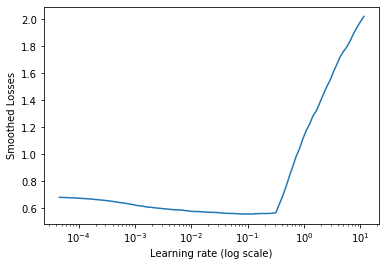

In [114]:
lr_finder = LR_Finder(start_lr=1e-5, end_lr=10, step_size=100)

lrf_model = modelGen(feature_columns_ens)

lrf_model.fit(ds_train_ens,
             validation_data=ds_val_ens,
             callbacks=[lr_finder],
             verbose = 1,
             epochs = 3
            )

lr_finder.plot_smoothed_loss()

##### 3.2.3. ENSEMBLE TRAINING

In [125]:
ens_model = modelGen(feature_columns_ens)

ens_model.optimizer.lr = 1e-2

filepath = 'models/tmp/best_final_model.hdf5'
check_point = ModelCheckpoint(filepath,
                              monitor='val_acc',
                              verbose=0,
                              save_best_only=True,
                              save_weights_only = True,
                              mode='max')

ens_model.fit(ds_train_ens,
             validation_data=ds_val_ens,
             callbacks=[check_point, early_stop],
             verbose = 0,
             epochs = 30
            )

print('Ensemble training finished')

Ensemble training finished


##### 3.2.5. RESULTS

In [126]:
# load ensemble model with best weights
ens_model_final = modelGen(feature_columns_ens)
ens_model_final.fit(ds_train_ens, validation_data=ds_val_ens, verbose = 0, steps_per_epoch=1, epochs = 1)
ens_model_final.load_weights(filepath)

# evaluating model accuracy
loss_ens, acc_ens = ens_model_final.evaluate(ds_val_ens,
                         steps=len(x_val_ens)//bs + 1,
                         verbose=0)

print('Accuracy Deep Learning Ensemble: {:5.2f}%'.format(100*acc_ens))

Accuracy Deep Learning Ensemble: 79.10%


<br></br>

In [117]:
# predicting labens
pred = ens_model.predict(ds_val_ens,
                         steps=len(x_val_ens)//bs + 1,
                         verbose=0)

Text(0.5, 15.0, 'Predicted label')

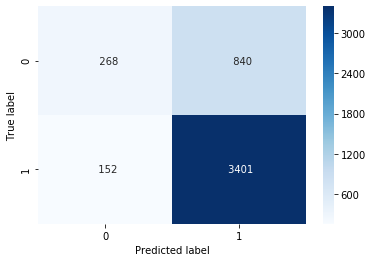

In [118]:
cm = confusion_matrix(y_val_ens, pred.mean(axis=1).round(0).astype(int))

plt.figure() 
sns.heatmap(cm, annot=True, cmap='Blues', fmt='5d')
plt.ylabel('True label')
plt.xlabel('Predicted label')